In [76]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import seaborn as sn

In [72]:
pip install seaborn

## Create train and test data

In [2]:
dataframe=pd.read_csv("C:\\Users\\DIVYA\\Documents\\MACHINELEARNINGWORKSHOPFILES\\RAVDESS,TESS---new.csv")

In [3]:
from sklearn.preprocessing import LabelEncoder
dataframe['Emotion']=LabelEncoder().fit_transform(dataframe['Emotion'])
y=dataframe[["Emotion"]]
x=dataframe.drop("Emotion",axis=1)
x=x.iloc[:,1:]

xtrain,xtest,ytrain,ytest= train_test_split(x,y,test_size=0.3,random_state=4)

In [77]:
#LABEL ENCODING VALUES

emotions={
  0:'angry',
  1:'calm',
  2:'disguist',
  3:'fear',
  4:'happy',
  5:'neutral',
  6:'sad',
  7:'surprised'
}
print(ytrain)

[[7]
 [2]
 [0]
 ...
 [0]
 [5]
 [6]]


In [39]:
print(xtrain.shape,xtest.shape)

(2968, 180) (1272, 180)


In [78]:
print(ytrain.shape,ytest.shape)

(2968, 1) (1272, 1)


In [84]:
xtrain.head()

,0,1,2,3,4,5,6,7,8,9,...,170,171,172,173,174,175,176,177,178,179
3451,-340.585358,50.505756,-43.175365,8.229817,-27.057051,7.879982,-15.267695,-6.054296,-12.611725,14.475309,...,2.365119e-03,1.974568e-03,2.404226e-03,2.552809e-03,9.966930e-04,2.762912e-04,7.187716e-05,5.285306e-05,1.188385e-05,2.059495e-06
1341,-465.343933,91.370842,30.462723,5.500630,-6.919105,-0.814426,-13.402053,7.010404,-23.884874,4.047946,...,1.887293e-03,1.328265e-03,8.508872e-04,4.222009e-04,2.308723e-04,7.444414e-05,2.771455e-05,4.298987e-06,4.593720e-07,3.926021e-08
1166,-411.188446,63.769764,-14.824328,10.112123,-4.868372,15.661233,-31.723658,-8.409113,-22.686392,-8.415514,...,1.099902e-04,1.197654e-04,1.225286e-04,9.603408e-05,4.602884e-05,1.932352e-05,7.656012e-06,2.147210e-06,4.831798e-07,4.566297e-08
2530,-425.442749,53.873550,-1.577813,-9.195426,-12.710704,9.624842,-10.503573,7.587773,-24.320599,6.661020,...,9.438109e-04,6.990420e-04,5.438702e-04,3.106352e-04,1.177289e-04,4.355398e-05,1.646106e-05,3.506113e-06,5.840812e-07,8.471959e-08
3953,-593.025330,81.248825,-26.873341,36.284527,-5.675488,4.694328,-5.918098,-0.002145,-8.869593,1.678475,...,1.667884e-11,3.583965e-11,3.928055e-11,5.579654e-11,4.180015e-11,6.227859e-11,3.791050e-11,6.286045e-11,3.527321e-11,3.965835e-11


## Add an axis (extra dimension) to input sets---grey scale image-1

In [85]:
x_traincnn = np.expand_dims(xtrain, axis=2)
x_testcnn = np.expand_dims(xtest, axis=2)
print(x_traincnn.shape,x_testcnn.shape)

(2968, 180, 1) (1272, 180, 1)


In [86]:
ytrain=np.array(ytrain)
ytest=np.array(ytest)
ytest.shape

(1272, 1)

## Building the Model using CNN

In [61]:
import matplotlib.pyplot as plt
import tensorflow.keras as keras

from keras.preprocessing import sequence
from keras.models import Sequential
from keras.layers import Dense, Embedding
from keras.utils import to_categorical
from keras.layers import Input, Flatten, Dropout, Activation
from keras.layers import Conv1D, MaxPooling1D
from keras.models import Model
from keras.callbacks import ModelCheckpoint

model = Sequential()
#first layer
model.add(Conv1D(64, 5,padding='same',
                 input_shape=(180,1)))
model.add(Activation('relu'))
model.add(Dropout(0.1))
model.add(MaxPooling1D(pool_size=(4)))

#second layer
model.add(Conv1D(128, 5,padding='same',))
model.add(Activation('relu'))
model.add(Dropout(0.1))
model.add(MaxPooling1D(pool_size=(4)))

#third layer
model.add(Conv1D(256, 5,padding='same',))
model.add(Activation('relu'))
model.add(Dropout(0.1))

#dense layer
model.add(Flatten())
model.add(Dense(8))
model.add(Activation('softmax'))
opt = keras.optimizers.Adam(lr=0.00005)

In [62]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_9 (Conv1D)            (None, 180, 64)           384       
_________________________________________________________________
activation_12 (Activation)   (None, 180, 64)           0         
_________________________________________________________________
dropout_9 (Dropout)          (None, 180, 64)           0         
_________________________________________________________________
max_pooling1d_6 (MaxPooling1 (None, 45, 64)            0         
_________________________________________________________________
conv1d_10 (Conv1D)           (None, 45, 128)           41088     
_________________________________________________________________
activation_13 (Activation)   (None, 45, 128)           0         
_________________________________________________________________
dropout_10 (Dropout)         (None, 45, 128)          

In [63]:
model.compile(loss='sparse_categorical_crossentropy',
              optimizer=opt,
              metrics=['accuracy'])
cnnhistory=model.fit(x_traincnn, ytrain, batch_size=16, epochs=200 ,validation_data=(x_testcnn, ytest))

Epoch 1/200
186/186 [==============================] - 2s 12ms/step - loss: 2.5560 - accuracy: 0.2844 - val_loss: 1.4759 - val_accuracy: 0.4843
Epoch 2/200
186/186 [==============================] - 2s 11ms/step - loss: 1.6817 - accuracy: 0.4710 - val_loss: 1.1926 - val_accuracy: 0.6352
Epoch 3/200
186/186 [==============================] - 2s 11ms/step - loss: 1.3810 - accuracy: 0.5559 - val_loss: 1.0351 - val_accuracy: 0.6588
Epoch 4/200
186/186 [==============================] - 2s 10ms/step - loss: 1.2068 - accuracy: 0.6149 - val_loss: 0.9764 - val_accuracy: 0.6698
Epoch 5/200
186/186 [==============================] - 2s 11ms/step - loss: 1.0817 - accuracy: 0.6509 - val_loss: 0.9019 - val_accuracy: 0.6989
Epoch 6/200
186/186 [==============================] - 2s 11ms/step - loss: 1.0102 - accuracy: 0.6728 - val_loss: 0.8507 - val_accuracy: 0.7044
Epoch 7/200
186/186 [==============================] - 2s 10ms/step - loss: 0.9441 - accuracy: 0.6924 - val_loss: 0.8211 - val_accuracy:

186/186 [==============================] - 2s 12ms/step - loss: 0.2945 - accuracy: 0.8912 - val_loss: 0.4580 - val_accuracy: 0.8357
Epoch 114/200
186/186 [==============================] - 2s 12ms/step - loss: 0.3006 - accuracy: 0.8922 - val_loss: 0.4487 - val_accuracy: 0.8349
Epoch 115/200
186/186 [==============================] - 2s 13ms/step - loss: 0.3044 - accuracy: 0.8929 - val_loss: 0.4594 - val_accuracy: 0.8373
Epoch 116/200
186/186 [==============================] - 2s 12ms/step - loss: 0.2964 - accuracy: 0.8972 - val_loss: 0.4504 - val_accuracy: 0.8333
Epoch 117/200
186/186 [==============================] - 2s 13ms/step - loss: 0.2874 - accuracy: 0.8925 - val_loss: 0.4632 - val_accuracy: 0.8412
Epoch 118/200
186/186 [==============================] - 3s 14ms/step - loss: 0.2987 - accuracy: 0.8905 - val_loss: 0.4768 - val_accuracy: 0.8302
Epoch 119/200
186/186 [==============================] - 3s 15ms/step - loss: 0.2850 - accuracy: 0.8966 - val_loss: 0.4645 - val_accuracy:

## EVALUATING MODEL

In [66]:
predictions = model.predict_classes(x_testcnn)

In [67]:
new_Ytest = ytest.astype(int)

### CLASSIFICATION REPORT AND CONFUSION MATRIX

In [68]:
from sklearn.metrics import classification_report
report = classification_report(new_Ytest, predictions)
print(report)

              precision    recall  f1-score   support

           0       0.87      0.90      0.88       174
           1       0.61      0.85      0.71        53
           2       0.91      0.84      0.87       196
           3       0.88      0.88      0.88       187
           4       0.79      0.85      0.82       170
           5       0.95      0.82      0.88       142
           6       0.84      0.81      0.82       179
           7       0.86      0.87      0.87       171

    accuracy                           0.85      1272
   macro avg       0.84      0.85      0.84      1272
weighted avg       0.86      0.85      0.85      1272



[[156   0   6   2   8   0   0   2]
 [  0  45   0   2   0   1   5   0]
 [  6   4 164   2   6   0   6   8]
 [  3   1   3 164  10   0   4   2]
 [  8   2   2   5 145   0   3   5]
 [  0  11   0   4   3 116   7   1]
 [  3  10   4   5   3   3 145   6]
 [  4   1   2   2   8   2   3 149]]


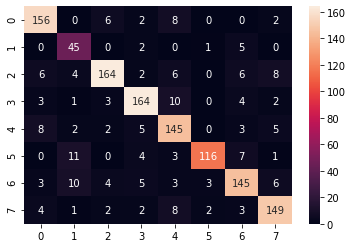

In [75]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(new_Ytest, predictions)
df_cm = pd.DataFrame(cm)
sn.heatmap(df_cm, annot=True, fmt='')
#print (matrix)

## Plotting graphs of model loss and model accuarcy

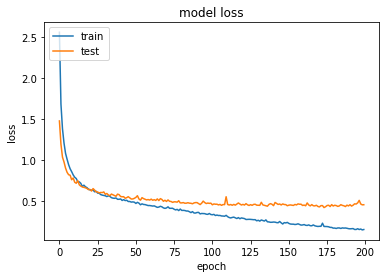

In [87]:
plt.plot(cnnhistory.history['loss'])
plt.plot(cnnhistory.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

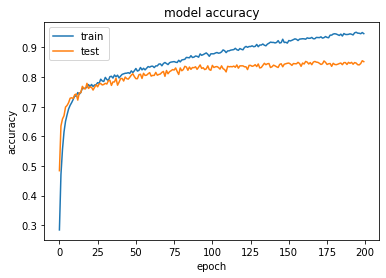

In [88]:
plt.plot(cnnhistory.history['accuracy'])
plt.plot(cnnhistory.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

### Testing with random test data --input shape must be modified

In [53]:
x_testcnn[101] #mistake because it expects a 2d
x_testcnn[101].shape

(180, 1)

In [51]:
#EXPAND DIMENSIONS TO SEND AS INPUT ONE WAY
#xt=xtest.iloc[7,:]
#x1 = np.expand_dims(xt.to_frame().transpose(), axis=2)
#print(x1.shape)

(1, 180, 1)


In [55]:
#ANOTHER WAY

x1 = np.expand_dims(x_testcnn[101], axis=0)
x1.shape

(1, 180, 1)

In [56]:
predictions = model.predict_classes(x1)
print(predictions)

[2]


In [58]:
ytest[101]

array([2])

## SAVING THE MODEL

In [90]:
model.save('testing2_model.h5')
print("MODEL SAVED")

MODEL SAVED


In [98]:
new_model=keras.models.load_model('testing2_model.h5')
new_model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_9 (Conv1D)            (None, 180, 64)           384       
_________________________________________________________________
activation_12 (Activation)   (None, 180, 64)           0         
_________________________________________________________________
dropout_9 (Dropout)          (None, 180, 64)           0         
_________________________________________________________________
max_pooling1d_6 (MaxPooling1 (None, 45, 64)            0         
_________________________________________________________________
conv1d_10 (Conv1D)           (None, 45, 128)           41088     
_________________________________________________________________
activation_13 (Activation)   (None, 45, 128)           0         
_________________________________________________________________
dropout_10 (Dropout)         (None, 45, 128)          

In [102]:
loss, acc = new_model.evaluate(x_testcnn, ytest)
print("Restored model, accuracy: {}%".format(100*acc))

40/40 [==============================] - 0s 4ms/step - loss: 0.4555 - accuracy: 0.1415
Restored model, accuracy: 14.150942862033844%
